# Introduction to Machine Learning, UZH 2018, Group Project
### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch
##       
# 2a. Feature Selection with RandomForestClassifier

In this section we use the feature matrices and the response vector that we prepared in chapter 1.  

#### We use two different versions (created in chapter 1):
Version 1: Feature Matrix consists only of the Ratios                                                                        
Version 2: Feature Matrix consists of Ratios + dummy variables for seasonality + other market data
####   


In [1]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier

## 2.0. Choose which Feature Matrix (Version 1 or 2) you want to load in by choosing the Case

#### 1) Choose the Dataset Version you want
VERSION = 1; Feature Matrix with only ratios                                  
VERSION = 2;  Feature Matrix with ratios + saisonality + other market data


In [2]:
### Chose which dataset version you want the selection of features and the prediction to be based on 
VERSION = 1
"""
INSERT NUMBER 1 or 2
"""


# Define sel_state variable for easier printing out    
if VERSION == 1:
    sel_version = 'Based on Dataset with only the Ratios Dataset as predicive Features'
elif VERSION == 2:
    sel_version = 'Based on Dataset with Ratios + Seasonality + other Market Data as predictive Features'
else: raise ValueError('VERSION must be either 1 or 2')

## 2.1. Preparation

### 2.1.1 Import the Response Vector and the Feature Matrices

In [3]:
# Load in the response vector 
y = pd.read_csv('Data/generated_datasets/response_1.csv', sep=',', header=0)

In [4]:
if VERSION == 1:
    X = pd.read_csv('Data/generated_datasets/features_ratios_1.csv', sep=',', header=0)
elif VERSION == 2:
    X = pd.read_csv('Data/generated_datasets/features_additional_1.csv', sep=',', header=0)
else: raise ValueError('VERSION value must be either 1 or 2')

### 2.1.2. Train/ Test Split and fill missing values with median

Standardization is not done because it is not necessary for Random Forest.

### Train/ Test Split

In [5]:
# Train/test split, into 20% test size and 80% train size because it is a relatively small dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Extract the feature labels
feature_labels = list(X)
print('Type of feature_labels = ' + str(type(feature_labels)))
print("")

Type of feature_labels = <class 'list'>



### Fill missing values

In [6]:
# Use a median fill for train
imp = Imputer(missing_values=np.nan, strategy = 'median' , axis=0)
imputed_dataset = pd.DataFrame(imp.fit_transform(X_train))
imputed_dataset.columns = X_train.columns
imputed_dataset.index = X_train.index
X_train = imputed_dataset

# Use a median fill for the test set
imputed_dataset = pd.DataFrame(imp.fit_transform(X_test))
imputed_dataset.columns = X_test.columns
imputed_dataset.index = X_test.index
X_test = imputed_dataset

### 2.2.3. Print out Shape and Form of Feature Matrix and Response Vector

### Train set

In [7]:
print('Shape of Feature Matrix X_train = ' + str(X_train.shape))
print("")
print('Feature Matrix X_train')
display(X_train.head())
print("")
print('Response Vector y_train')
display(y_train.head())
print("")

# Check if there is the approximately same percentage of '1' the train response vector
print('Ratio of "Ones" (Train)  =  ' + str(y_train.sum() / y_train.size))

Shape of Feature Matrix X_train = (2836, 71)

Feature Matrix X_train


,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,...,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,PEG_1yrforward,PEG_ltgforward
1530,20.773,0.547,10.644,15.468,15.633,18.484,18.484,3.703,9.957,0.623,...,1.4240,0.136,0.058,0.000,0.048,1.811,1.181,0.0354,13.678,5.963
1397,25.089,0.461,9.246,17.203,17.296,39.232,39.232,0.689,8.509,2.175,...,4.9910,0.031,0.000,0.000,0.047,2.189,0.668,0.0398,1.521,5.702
2238,12.337,0.911,12.474,9.135,9.209,13.062,13.062,2.034,1.993,0.337,...,5.8105,0.000,0.024,0.291,0.038,1.076,3.048,0.0268,0.380,2.248
3170,14.924,0.474,10.373,15.292,15.411,17.287,17.287,2.449,9.965,0.155,...,1.1490,0.132,0.008,0.000,0.052,2.269,0.980,0.0121,1.334,2.020
2244,12.689,0.964,13.526,10.430,10.504,15.362,15.362,2.181,7.512,0.516,...,5.8105,0.000,0.024,0.291,0.006,1.071,0.980,0.0269,0.645,3.414



Response Vector y_train


,0
1530,0
1397,1
2238,0
3170,1
2244,1



Ratio of "Ones" (Train)  =  0    0.580748
dtype: float64


### Test set

In [8]:
print('Shape of Feature Matrix X_test = ' + str(X_test.shape))
print("")
print('Feature Matrix X_test')
display(X_test.head())
print("")
print('Response Vector y_test')
display(y_test.head())
print("")

# Check if there is the approximately same percentage of '1' in the test response vector
print('Ratio of "Ones" (Test)  =  ' + str(y_test.sum() / y_test.size))

Shape of Feature Matrix X_test = (710, 71)

Feature Matrix X_test


,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,...,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,PEG_1yrforward,PEG_ltgforward
817,20.983,0.254,8.585,16.127,16.224,16.224,16.224,3.318,10.484,0.287,...,6.768,0.031,0.006,0.000,0.084,4.189,1.022,0.0187,1.414,1.330
2592,21.663,0.235,13.619,16.311,16.489,18.555,18.555,2.379,7.709,0.199,...,7.169,0.000,0.000,0.195,0.039,4.281,1.147,0.0122,1.737,1.572
1475,16.327,0.513,6.716,9.520,9.520,15.681,15.550,3.293,8.490,0.792,...,1.286,0.162,0.054,0.000,0.077,2.198,1.022,0.0343,-0.973,6.149
1826,12.178,0.347,10.118,9.094,9.122,10.795,10.795,2.703,13.306,0.550,...,3.059,0.211,0.000,0.000,-0.025,3.235,1.199,0.0506,-1.678,6.623
599,18.039,0.596,4.676,8.729,8.790,8.790,8.790,0.695,6.216,0.255,...,18.561,0.002,0.000,0.000,0.059,1.797,0.123,0.0335,0.523,1.336



Response Vector y_test


,0
817,1
2592,0
1475,1
1826,1
599,0



Ratio of "Ones" (Test)  =  0    0.570423
dtype: float64


###    
## 2.2. Selecting & Extracting Features

### 2.2.1.  Fit forest and show list of best 'n' features according to explanatory value

# ===> MATHIAS LOOP FOR RUNNING THE CODE WITH  random_state 0 to 10 and then select best n features

In [9]:
forest = RandomForestClassifier(random_state = 0)
forest.max_depth = 6
forest.fit(X_train, y_train)

# Check features for their importance for the prediction
feature_importances = forest.feature_importances_

# sort features in line with their importance for the prediction
indices = np.argsort(feature_importances)[::-1]

# print best n features
n = 15
for i in range(n):
    print('{0:2d} {1:7s} {2:6.4f}'.format(i + 1, feature_labels[indices[i]], 
                                          feature_importances[indices[i]]))
del i

 1 CAPEI   0.0642
 2 pcf     0.0641
 3 pe_op_basic 0.0560
 4 bm      0.0553
 5 ptb     0.0404
 6 PEG_ltgforward 0.0365
 7 evm     0.0302
 8 ps      0.0274
 9 pe_exi  0.0273
10 divyield 0.0264
11 PEG_1yrforward 0.0228
12 pe_inc  0.0223
13 invt_act 0.0216
14 pe_op_dil 0.0201
15 roce    0.0166


### 2.2.2.  Plotting results

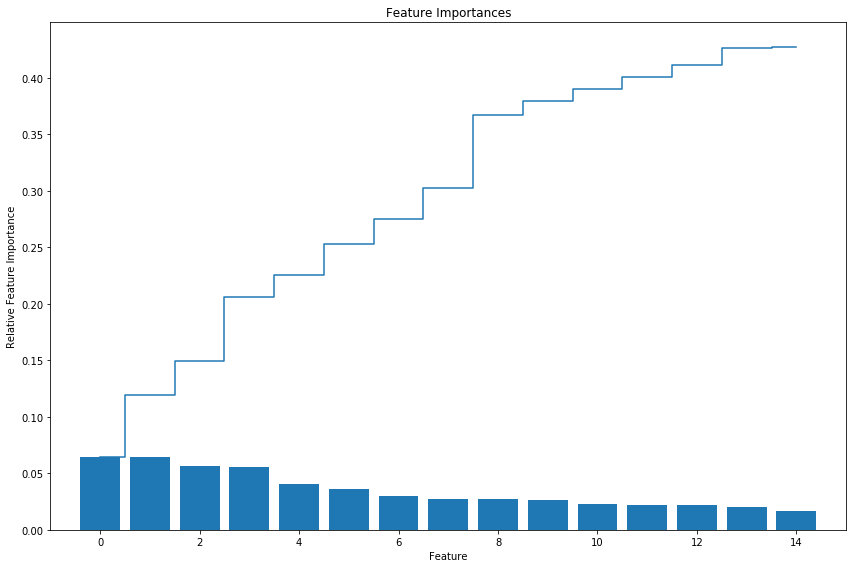

In [10]:
# Get cumsum of the n most important features
feat_imp = np.sort(feature_importances)[::-1]
sum_feat_imp = np.cumsum(feature_importances)[:n]

# Plot Feature Importance (both cumulative and individual)
plt.figure(figsize = (12, 8))
plt.title('Feature Importances')
plt.bar(range(n), feature_importances[indices[:n]], align = 'center')
#plt.xticks(range(n), feature_labels[indices[:n]], rotation = 90)
plt.xlim([-1, n])
plt.xlabel('Feature')
plt.ylabel('Relative Feature Importance')
plt.step(range(n), sum_feat_imp, where = 'mid', label = 'Cumulative Feature Importance')
plt.tight_layout();

### 2.2.3. Extract best 'n' Variables and save into new Feature Matrices


### Extract

In [11]:
# Extract only the n best variables directly from the feature matrix into a new one
best_features = []
n = 15
for i in range(n):
    best_features.append(feature_labels[indices[i]])
del i
X_train_f = X_train[best_features]
X_test_f = X_test[best_features]

feature_labels_f = X_train_f.columns[:-1]

In [12]:
print("")
print('Feature Matrix with selected Features (Train)')
display(X_train_f.head())
print("")
print('Feature Matrix with selected Features (Test)')
display(X_test_f.head())
print("")


Feature Matrix with selected Features (Train)


,CAPEI,pcf,pe_op_basic,bm,ptb,PEG_ltgforward,evm,ps,pe_exi,divyield,PEG_1yrforward,pe_inc,invt_act,pe_op_dil,roce
1530,20.773,9.957,15.468,0.547,1.811,5.963,10.644,3.703,18.484,0.0354,13.678,18.484,0.108,15.633,0.140
1397,25.089,8.509,17.203,0.461,2.189,5.702,9.246,0.689,39.232,0.0398,1.521,39.232,0.368,17.296,0.105
2238,12.337,1.993,9.135,0.911,1.076,2.248,12.474,2.034,13.062,0.0268,0.380,13.062,0.152,9.209,0.075
3170,14.924,9.965,15.292,0.474,2.269,2.020,10.373,2.449,17.287,0.0121,1.334,17.287,0.028,15.411,0.139
2244,12.689,7.512,10.430,0.964,1.071,3.414,13.526,2.181,15.362,0.0269,0.645,15.362,0.152,10.504,0.069



Feature Matrix with selected Features (Test)


,CAPEI,pcf,pe_op_basic,bm,ptb,PEG_ltgforward,evm,ps,pe_exi,divyield,PEG_1yrforward,pe_inc,invt_act,pe_op_dil,roce
817,20.983,10.484,16.127,0.254,4.189,1.330,8.585,3.318,16.224,0.0187,1.414,16.224,0.025,16.224,0.364
2592,21.663,7.709,16.311,0.235,4.281,1.572,13.619,2.379,18.555,0.0122,1.737,18.555,0.157,16.489,0.108
1475,16.327,8.490,9.520,0.513,2.198,6.149,6.716,3.293,15.681,0.0343,-0.973,15.550,0.078,9.520,0.196
1826,12.178,13.306,9.094,0.347,3.235,6.623,10.118,2.703,10.795,0.0506,-1.678,10.795,0.107,9.122,0.240
599,18.039,6.216,8.729,0.596,1.797,1.336,4.676,0.695,8.790,0.0335,0.523,8.790,0.110,8.790,0.360


### Save

In [13]:

if VERSION == 1:
    X_train_f.to_csv('Data/generated_splits/features_selected_randomforest/X1_train_f.csv', index = False)
    X_test_f.to_csv('Data/generated_splits/features_selected_randomforest/X1_test_f.csv', index = False)
    #feature_labels_f.to_csv('Data/generated_splits/features_selected_randomforest/feature1_labels_f.csv')
    y_train.to_csv('Data/generated_splits/features_selected_randomforest/y1_train_f.csv', index = False)
    y_test.to_csv('Data/generated_splits/features_selected_randomforest/y1_test_f.csv', index = False)
elif VERSION == 2:
    X_train_f.to_csv('Data/generated_splits/features_selected_randomforest/X2_train_f.csv', index = False)
    X_test_f.to_csv('Data/generated_splits/features_selected_randomforest/X2_test_f.csv', index = False)
    #feature_labels_f.to_csv('Data/generated_splits/features_selected_randomforest/feature2_labels_f.csv')
    y_train.to_csv('Data/generated_splits/features_selected_randomforest/y2_train_f.csv', index = False)
    y_test.to_csv('Data/generated_splits/features_selected_randomforest/y2_test_f.csv', index = False)
else: raise ValueError('VERSION value must be either 1 or 2')